In [1]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
from PIL import Image
import kagglehub
import glob
import os

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Running on device: {device}")

# Data Loading
print("Downloading/Loading FG-NET dataset...")
path = kagglehub.dataset_download("aiolapo/fgnet-dataset")

def get_image_path(pattern):
    matches = glob.glob(pattern, recursive=True)
    if not matches:
        raise FileNotFoundError(f"No match found for pattern: {pattern}")
    return matches[0]

age_paths = {
    'newborn': get_image_path(f"{path}/**/080A00.JPG"),
    'older_infant': get_image_path(f"{path}/**/080A01.JPG"),
    'toddler': get_image_path(f"{path}/**/080A02.JPG"),
    'preschool_child': get_image_path(f"{path}/**/080A04.JPG"),
    'schoolage_child': get_image_path(f"{path}/**/080A07.JPG")
}

# Define Questions
questions_on_empiricism = [
    'Alex can see things with his eyes. When could Alex see with his eyes for the first time?',
    'When there is a sound close by, Alex can hear it. When could Alex hear sounds for the first time?',
    'When seeing a red flower and a blue flower, Alex can tell that they are different colors. Alex can tell colors apart. When could Alex tell colors apart for the first time?',
    'When there is a car approaching, Alex can tell that the car is getting closer. Alex can tell what is near and what is far. When could Alex tell near and far for the first time?',
    'When Alex sees someone hold an object and then drop it, Alex thinks the object will fall. Alex thinks objects will fall if we let go of them. When could Alex think that for the first time?',
    'If Alex sees a toy being hidden in a box, he will think the object is still there even though he can no longer see it. When could Alex think that for the first time?',
    'If Alex sees two cookies, one with 5 chocolate chips in it and one with 20 chocolate chips in it, he can tell which cookie has more chocolate chips without counting. When could Alex tell which has more for the first time?',
    'If Alex sees a turtle that is upside down and struggling to get on its feet, he thinks that he should help the turtle. Alex thinks that helping is the right thing to do. When could Alex think that for the first time?',
    'Alex can read books. When could Alex read for the first time?'
]

# Model Initialization
print("Loading Moondream2 model (Latest Version)...")
model_id = "vikhyatk/moondream2"
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    trust_remote_code=True,
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
).to(device)

try:
    tokenizer = AutoTokenizer.from_pretrained(model_id)
    print("Model loaded successfully.")
except:
    print("Couldnt load model")

# Visual pre-processing helper
def stitch_images_side_by_side(image_paths_list):
    images = [Image.open(p).convert("RGB") for p in image_paths_list]
    widths, heights = zip(*(i.size for i in images))
    total_width = sum(widths)
    max_height = max(heights)
    new_im = Image.new('RGB', (total_width, max_height), (255, 255, 255))
    x_offset = 0
    for im in images:
        new_im.paste(im, (x_offset, 0))
        x_offset += im.size[0]
    return new_im

# Experiment Loop
print(f"Starting Inference on {len(questions_on_empiricism)} questions...")
print("="*60)

# Prepare visual input
current_image_paths = [
    age_paths['newborn'],
    age_paths['toddler'],
    age_paths['schoolage_child']
]
combined_image = stitch_images_side_by_side(current_image_paths)

# New Moondream API doesn't need manual encoding step for 'query'
results = []

for i, question in enumerate(questions_on_empiricism):
    # Updated prompt for better clarity with the new model version
    prompt = (
        f"There are three images side-by-side. "
        f"Left: Image 1 (Newborn). "
        f"Middle: Image 2 (Toddler). "
        f"Right: Image 3 (School-age child). "
        f"\n\nQuestion: {question}"
        f"\n\nWhich image number (1, 2, or 3) answers this best?"
    )

    answer_dict = model.query(combined_image, prompt)
    answer = answer_dict["answer"]

    results.append(answer)
    print(f"Q{i+1}: {question}")
    print(f"Moondream Answer: {answer}")
    print("-" * 60)

# Results
print("Raw Results for Plotting:")
print(results)

Running on device: cuda
Downloading/Loading FG-NET dataset...
Using Colab cache for faster access to the 'fgnet-dataset' dataset.
Loading Moondream2 model (Latest Version)...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/277 [00:00<?, ?B/s]

hf_moondream.py: 0.00B [00:00, ?B/s]

config.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/vikhyatk/moondream2:
- config.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


utils.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/vikhyatk/moondream2:
- utils.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


region.py: 0.00B [00:00, ?B/s]

layers.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/vikhyatk/moondream2:
- layers.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/vikhyatk/moondream2:
- region.py
- layers.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


image_crops.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/vikhyatk/moondream2:
- image_crops.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


text.py: 0.00B [00:00, ?B/s]

rope.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/vikhyatk/moondream2:
- rope.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/vikhyatk/moondream2:
- text.py
- rope.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


moondream.py: 0.00B [00:00, ?B/s]

lora.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/vikhyatk/moondream2:
- lora.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


vision.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/vikhyatk/moondream2:
- vision.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/vikhyatk/moondream2:
- moondream.py
- lora.py
- vision.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/vikhyatk/moondream2:
- hf_moondream.py
- config.py
- utils.py
- region.py
- image_crops.py
- text.py
- moondream.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors:   0%|          | 0.00/3.85G [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

generation_config.json:   0%|          | 0.00/69.0 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

Model loaded successfully.
Starting Inference on 9 questions...
Q1: Alex can see things with his eyes. When could Alex see with his eyes for the first time?
Moondream Answer: 3
------------------------------------------------------------
Q2: When there is a sound close by, Alex can hear it. When could Alex hear sounds for the first time?
Moondream Answer: 3
------------------------------------------------------------
Q3: When seeing a red flower and a blue flower, Alex can tell that they are different colors. Alex can tell colors apart. When could Alex tell colors apart for the first time?
Moondream Answer: 3
------------------------------------------------------------
Q4: When there is a car approaching, Alex can tell that the car is getting closer. Alex can tell what is near and what is far. When could Alex tell near and far for the first time?
Moondream Answer: 3
------------------------------------------------------------
Q5: When Alex sees someone hold an object and then drop it, 

### Training a Simple Machine Learning Model: Linear Regression

This example demonstrates how to train a basic linear regression model using `scikit-learn` on some generated data.

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Generate Sample Data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # added noise for relaism

df_ml = pd.DataFrame({'Feature': X.flatten(), 'Target': y.flatten()})
display(df_ml.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data points: {len(X_train)}")
print(f"Test data points: {len(X_test)}")

,Feature,Target
0,1.097627,6.127731
1,1.430379,9.191963
2,1.205527,8.082243
3,1.089766,5.733055
4,0.847310,8.030181


Training data points: 80
Test data points: 20


In [3]:
# Creation and training
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training complete.")
print(f"Intercept: {model.intercept_[0]:.2f}")
print(f"Coefficient: {model.coef_[0][0]:.2f}")

Model training complete.
Intercept: 4.21
Coefficient: 2.99


Mean Squared Error (MSE): 0.92
R-squared (R2): 0.65


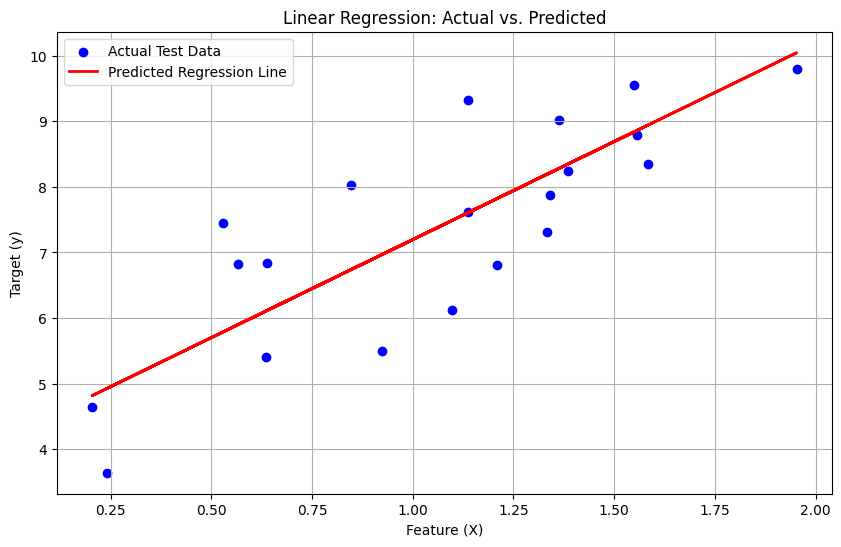

In [4]:
# Prediction and evaluation
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Test Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Regression Line')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.show()